# 422 - Big Data - Assignment 3 - Digit Classification
Team Nugget - Crystal, Daria, Mei, Pallavi, Sarah

February 24th, 2018

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Importing-libraries-and-Data" data-toc-modified-id="Importing-libraries-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries and Data</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Predicting-on-the-test-data" data-toc-modified-id="Predicting-on-the-test-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting on the test data</a></span></li></ul></div>

### Overview

Aim - To classify hand-written digits from zero through nine, using Multilayer Perceptron Algorithm (MLP CLassifier from scikit learn).

Dataset can be found online at - http://yann.lecun.com/exdb/mnist/ 

Although, I have used the CSVs available on this website - https://pjreddie.com/projects/mnist-in-csv/

1) Run simple ML on this to recognize digits 0-9 (you can use their technique or any other technique you’d like)

2) This should include training phase and model usage (classification of 10K test set)

3) Understand characteristics of the hardware you’re running this on

4) Time execution and measure memory usage of both training phase and model usage phase

5) Estimate (in words and numbers, show work) time (and resources) required to handle a training set of 60B images and a test set of 10B

Answers :-

Q1 and 2 - The following python code uses MLP Classifier to recognize the digits including training and model usage (testing) phases.

Q3 - The image below shows the hardware characteristics that the model is running on - (RAM - 4GB 1600 MHz DDR3, Processor - 1.4 GHz Intel Core i5)

Q4 - We have used time() to record the execution times of the data loading, model training and testing phase. Similarly, for memory usgae we have used the magic function %memit. Following are the results -
- Time execution (in seconds) : Train set - 9.46 (reading) + 0.89+340.19 (training) => Total = 350.54s ~ 5.84mins
- Memory usage (in MiB) : Train set - 742.93 (reading) + 0.02+0.02+994.70 (training) => Total = 1737.67MiB ~ 1822MB
- Time execution (in seconds) : Test set - 1.89 (reading) + 1.26 (prediction) => Total = 3.15s ~ 0.05mins
- Memory usage (in MiB) : Test set - 88.92 (reading) + 0.29+0.04+98.06 (prediction) => Total = 187.31MiB ~ 196MB

Q5 - To estimate the time and memory usage for 60B training set and 10B test set, let us calculate using unitary method -
- Time execution, 60B training set = (5.84mins/60000)*60B = 5,840,000mins ~ 97,333hrs ~ 4056 days!
- Memory usage, 60B training set = (1822MB/60000)*60B = 1,822,000,000MB ~ 1.822 Petabytes!
- Time execution, 10B test set = (0.05mins/10000)*10B = 50,000mins ~ 833hrs ~ 35 days!
- Memory usage, 10B test set = (196MB/10000)*10B = 196,000,000MB ~ 0.196 Petabytes!

This size of data is too huge to be read and processed and run a model on this hardware. This would definitely require distributed systems.

In [39]:
%%html 
<img src="System-Config.png",height=200, width=500>

### Importing libraries and Data

In [40]:
# For data loading and manipulation
import numpy as np
import pandas as pd

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
import matplotlib.pyplot as plt
%matplotlib inline

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# For time and resource estimation
import resource
from memory_profiler import profile
from time import time
%load_ext memory_profiler
# This will print the memory usage in Mebibyte. Can convert to Megabyte using 1MiB = 1.04858MB

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [41]:
print("Start Memory is :",resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)
t1 = time()
%memit train_data = pd.read_csv("mnist_train.csv",header=None, names=['label','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','p21','p22','p23','p24','p25','p26','p27','p28','p29','p30','p31','p32','p33','p34','p35','p36','p37','p38','p39','p40','p41','p42','p43','p44','p45','p46','p47','p48','p49','p50','p51','p52','p53','p54','p55','p56','p57','p58','p59','p60','p61','p62','p63','p64','p65','p66','p67','p68','p69','p70','p71','p72','p73','p74','p75','p76','p77','p78','p79','p80','p81','p82','p83','p84','p85','p86','p87','p88','p89','p90','p91','p92','p93','p94','p95','p96','p97','p98','p99','p100','p101','p102','p103','p104','p105','p106','p107','p108','p109','p110','p111','p112','p113','p114','p115','p116','p117','p118','p119','p120','p121','p122','p123','p124','p125','p126','p127','p128','p129','p130','p131','p132','p133','p134','p135','p136','p137','p138','p139','p140','p141','p142','p143','p144','p145','p146','p147','p148','p149','p150','p151','p152','p153','p154','p155','p156','p157','p158','p159','p160','p161','p162','p163','p164','p165','p166','p167','p168','p169','p170','p171','p172','p173','p174','p175','p176','p177','p178','p179','p180','p181','p182','p183','p184','p185','p186','p187','p188','p189','p190','p191','p192','p193','p194','p195','p196','p197','p198','p199','p200','p201','p202','p203','p204','p205','p206','p207','p208','p209','p210','p211','p212','p213','p214','p215','p216','p217','p218','p219','p220','p221','p222','p223','p224','p225','p226','p227','p228','p229','p230','p231','p232','p233','p234','p235','p236','p237','p238','p239','p240','p241','p242','p243','p244','p245','p246','p247','p248','p249','p250','p251','p252','p253','p254','p255','p256','p257','p258','p259','p260','p261','p262','p263','p264','p265','p266','p267','p268','p269','p270','p271','p272','p273','p274','p275','p276','p277','p278','p279','p280','p281','p282','p283','p284','p285','p286','p287','p288','p289','p290','p291','p292','p293','p294','p295','p296','p297','p298','p299','p300','p301','p302','p303','p304','p305','p306','p307','p308','p309','p310','p311','p312','p313','p314','p315','p316','p317','p318','p319','p320','p321','p322','p323','p324','p325','p326','p327','p328','p329','p330','p331','p332','p333','p334','p335','p336','p337','p338','p339','p340','p341','p342','p343','p344','p345','p346','p347','p348','p349','p350','p351','p352','p353','p354','p355','p356','p357','p358','p359','p360','p361','p362','p363','p364','p365','p366','p367','p368','p369','p370','p371','p372','p373','p374','p375','p376','p377','p378','p379','p380','p381','p382','p383','p384','p385','p386','p387','p388','p389','p390','p391','p392','p393','p394','p395','p396','p397','p398','p399','p400','p401','p402','p403','p404','p405','p406','p407','p408','p409','p410','p411','p412','p413','p414','p415','p416','p417','p418','p419','p420','p421','p422','p423','p424','p425','p426','p427','p428','p429','p430','p431','p432','p433','p434','p435','p436','p437','p438','p439','p440','p441','p442','p443','p444','p445','p446','p447','p448','p449','p450','p451','p452','p453','p454','p455','p456','p457','p458','p459','p460','p461','p462','p463','p464','p465','p466','p467','p468','p469','p470','p471','p472','p473','p474','p475','p476','p477','p478','p479','p480','p481','p482','p483','p484','p485','p486','p487','p488','p489','p490','p491','p492','p493','p494','p495','p496','p497','p498','p499','p500','p501','p502','p503','p504','p505','p506','p507','p508','p509','p510','p511','p512','p513','p514','p515','p516','p517','p518','p519','p520','p521','p522','p523','p524','p525','p526','p527','p528','p529','p530','p531','p532','p533','p534','p535','p536','p537','p538','p539','p540','p541','p542','p543','p544','p545','p546','p547','p548','p549','p550','p551','p552','p553','p554','p555','p556','p557','p558','p559','p560','p561','p562','p563','p564','p565','p566','p567','p568','p569','p570','p571','p572','p573','p574','p575','p576','p577','p578','p579','p580','p581','p582','p583','p584','p585','p586','p587','p588','p589','p590','p591','p592','p593','p594','p595','p596','p597','p598','p599','p600','p601','p602','p603','p604','p605','p606','p607','p608','p609','p610','p611','p612','p613','p614','p615','p616','p617','p618','p619','p620','p621','p622','p623','p624','p625','p626','p627','p628','p629','p630','p631','p632','p633','p634','p635','p636','p637','p638','p639','p640','p641','p642','p643','p644','p645','p646','p647','p648','p649','p650','p651','p652','p653','p654','p655','p656','p657','p658','p659','p660','p661','p662','p663','p664','p665','p666','p667','p668','p669','p670','p671','p672','p673','p674','p675','p676','p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690','p691','p692','p693','p694','p695','p696','p697','p698','p699','p700','p701','p702','p703','p704','p705','p706','p707','p708','p709','p710','p711','p712','p713','p714','p715','p716','p717','p718','p719','p720','p721','p722','p723','p724','p725','p726','p727','p728','p729','p730','p731','p732','p733','p734','p735','p736','p737','p738','p739','p740','p741','p742','p743','p744','p745','p746','p747','p748','p749','p750','p751','p752','p753','p754','p755','p756','p757','p758','p759','p760','p761','p762','p763','p764','p765','p766','p767','p768','p769','p770','p771','p772','p773','p774','p775','p776','p777','p778','p779','p780','p781','p782','p783','p784'])
print(train_data.head())
t2 = time()
print("Train set read time:",format(t2-t1))

Start Memory is : 1751674880
peak memory: 1372.57 MiB, increment: 742.93 MiB
   label  p1  p2  p3  p4  p5  p6  p7  p8  p9  ...   p775  p776  p777  p778  \
0      5   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
1      0   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
2      4   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
3      1   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
4      9   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   

   p779  p780  p781  p782  p783  p784  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 785 columns]
Train set read time: 9.463279008865356


In [42]:
t1 = time()
%memit test_data = pd.read_csv("mnist_test.csv",header=None, names=['label','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','p21','p22','p23','p24','p25','p26','p27','p28','p29','p30','p31','p32','p33','p34','p35','p36','p37','p38','p39','p40','p41','p42','p43','p44','p45','p46','p47','p48','p49','p50','p51','p52','p53','p54','p55','p56','p57','p58','p59','p60','p61','p62','p63','p64','p65','p66','p67','p68','p69','p70','p71','p72','p73','p74','p75','p76','p77','p78','p79','p80','p81','p82','p83','p84','p85','p86','p87','p88','p89','p90','p91','p92','p93','p94','p95','p96','p97','p98','p99','p100','p101','p102','p103','p104','p105','p106','p107','p108','p109','p110','p111','p112','p113','p114','p115','p116','p117','p118','p119','p120','p121','p122','p123','p124','p125','p126','p127','p128','p129','p130','p131','p132','p133','p134','p135','p136','p137','p138','p139','p140','p141','p142','p143','p144','p145','p146','p147','p148','p149','p150','p151','p152','p153','p154','p155','p156','p157','p158','p159','p160','p161','p162','p163','p164','p165','p166','p167','p168','p169','p170','p171','p172','p173','p174','p175','p176','p177','p178','p179','p180','p181','p182','p183','p184','p185','p186','p187','p188','p189','p190','p191','p192','p193','p194','p195','p196','p197','p198','p199','p200','p201','p202','p203','p204','p205','p206','p207','p208','p209','p210','p211','p212','p213','p214','p215','p216','p217','p218','p219','p220','p221','p222','p223','p224','p225','p226','p227','p228','p229','p230','p231','p232','p233','p234','p235','p236','p237','p238','p239','p240','p241','p242','p243','p244','p245','p246','p247','p248','p249','p250','p251','p252','p253','p254','p255','p256','p257','p258','p259','p260','p261','p262','p263','p264','p265','p266','p267','p268','p269','p270','p271','p272','p273','p274','p275','p276','p277','p278','p279','p280','p281','p282','p283','p284','p285','p286','p287','p288','p289','p290','p291','p292','p293','p294','p295','p296','p297','p298','p299','p300','p301','p302','p303','p304','p305','p306','p307','p308','p309','p310','p311','p312','p313','p314','p315','p316','p317','p318','p319','p320','p321','p322','p323','p324','p325','p326','p327','p328','p329','p330','p331','p332','p333','p334','p335','p336','p337','p338','p339','p340','p341','p342','p343','p344','p345','p346','p347','p348','p349','p350','p351','p352','p353','p354','p355','p356','p357','p358','p359','p360','p361','p362','p363','p364','p365','p366','p367','p368','p369','p370','p371','p372','p373','p374','p375','p376','p377','p378','p379','p380','p381','p382','p383','p384','p385','p386','p387','p388','p389','p390','p391','p392','p393','p394','p395','p396','p397','p398','p399','p400','p401','p402','p403','p404','p405','p406','p407','p408','p409','p410','p411','p412','p413','p414','p415','p416','p417','p418','p419','p420','p421','p422','p423','p424','p425','p426','p427','p428','p429','p430','p431','p432','p433','p434','p435','p436','p437','p438','p439','p440','p441','p442','p443','p444','p445','p446','p447','p448','p449','p450','p451','p452','p453','p454','p455','p456','p457','p458','p459','p460','p461','p462','p463','p464','p465','p466','p467','p468','p469','p470','p471','p472','p473','p474','p475','p476','p477','p478','p479','p480','p481','p482','p483','p484','p485','p486','p487','p488','p489','p490','p491','p492','p493','p494','p495','p496','p497','p498','p499','p500','p501','p502','p503','p504','p505','p506','p507','p508','p509','p510','p511','p512','p513','p514','p515','p516','p517','p518','p519','p520','p521','p522','p523','p524','p525','p526','p527','p528','p529','p530','p531','p532','p533','p534','p535','p536','p537','p538','p539','p540','p541','p542','p543','p544','p545','p546','p547','p548','p549','p550','p551','p552','p553','p554','p555','p556','p557','p558','p559','p560','p561','p562','p563','p564','p565','p566','p567','p568','p569','p570','p571','p572','p573','p574','p575','p576','p577','p578','p579','p580','p581','p582','p583','p584','p585','p586','p587','p588','p589','p590','p591','p592','p593','p594','p595','p596','p597','p598','p599','p600','p601','p602','p603','p604','p605','p606','p607','p608','p609','p610','p611','p612','p613','p614','p615','p616','p617','p618','p619','p620','p621','p622','p623','p624','p625','p626','p627','p628','p629','p630','p631','p632','p633','p634','p635','p636','p637','p638','p639','p640','p641','p642','p643','p644','p645','p646','p647','p648','p649','p650','p651','p652','p653','p654','p655','p656','p657','p658','p659','p660','p661','p662','p663','p664','p665','p666','p667','p668','p669','p670','p671','p672','p673','p674','p675','p676','p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690','p691','p692','p693','p694','p695','p696','p697','p698','p699','p700','p701','p702','p703','p704','p705','p706','p707','p708','p709','p710','p711','p712','p713','p714','p715','p716','p717','p718','p719','p720','p721','p722','p723','p724','p725','p726','p727','p728','p729','p730','p731','p732','p733','p734','p735','p736','p737','p738','p739','p740','p741','p742','p743','p744','p745','p746','p747','p748','p749','p750','p751','p752','p753','p754','p755','p756','p757','p758','p759','p760','p761','p762','p763','p764','p765','p766','p767','p768','p769','p770','p771','p772','p773','p774','p775','p776','p777','p778','p779','p780','p781','p782','p783','p784'])
print(test_data.head())
t2 = time()
print("Test set read time:",format(t2-t1))

peak memory: 1103.05 MiB, increment: 88.92 MiB
   label  p1  p2  p3  p4  p5  p6  p7  p8  p9  ...   p775  p776  p777  p778  \
0      7   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
1      2   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
2      1   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
3      0   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   
4      4   0   0   0   0   0   0   0   0   0  ...      0     0     0     0   

   p779  p780  p781  p782  p783  p784  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 785 columns]
Test set read time: 1.8949861526489258


### Exploring the data

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to p784
dtypes: int64(785)
memory usage: 359.3 MB


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to p784
dtypes: int64(785)
memory usage: 59.9 MB


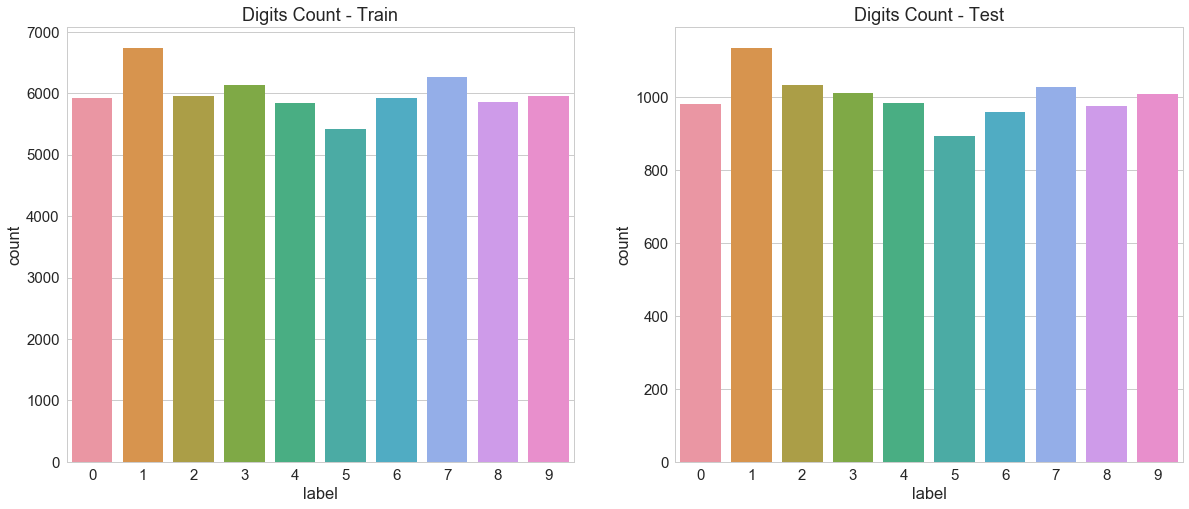

In [45]:
plt.subplots(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot('label',data=train_data).set_title('Digits Count - Train')
plt.subplot(1,2,2)
sns.countplot('label',data=test_data).set_title('Digits Count - Test')

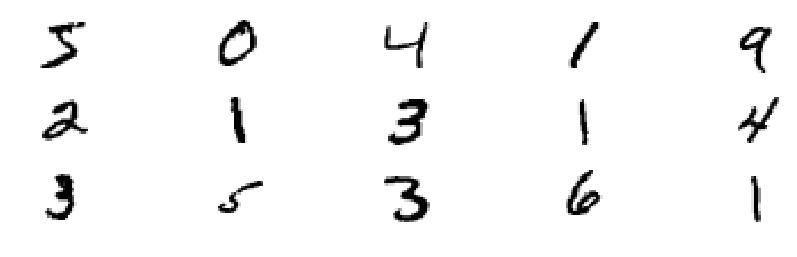

In [46]:
# define function that displays the n-th first images of a data set
def display_image(n, dataset, cmap):
    # create figure
    fig = plt.figure(figsize=(15,4))
    # loop over the first images of the training set
    for i in range(n):
        ax = plt.subplot(int(n/5), 5, i+1)
        ax.axis('off')
        image = dataset.iloc[i, :].values.reshape(28, 28)    
        imgplot = plt.imshow(image, cmap=cmap)
    plt.show()

# we omit the first column of the training set since it contains the image label
display_image(15, train_data.drop('label', axis=1), 'binary')

### Training the model

In [47]:
t1 = time()
# Separating the dataset into label and training features
% memit X_train = train_data.iloc[:, 1:] # omit the first column since it contains the label
% memit y_train = train_data.iloc[:, 0]  # extract the labels from the dataset (1st column)
% memit print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape)
t2 = time()
print("X and Y split time:",format(t2-t1))

peak memory: 1049.04 MiB, increment: 0.02 MiB
peak memory: 1048.80 MiB, increment: 0.00 MiB
X_train shape: (60000, 784) y_train shape: (60000,)
X_train shape: (60000, 784) y_train shape: (60000,)
X_train shape: (60000, 784) y_train shape: (60000,)
X_train shape: (60000, 784) y_train shape: (60000,)
X_train shape: (60000, 784) y_train shape: (60000,)
peak memory: 794.38 MiB, increment: 0.00 MiB
X and Y split time: 0.8859200477600098


In [48]:
t1 = time()
# instantiate the MLP classifier
% memit clf = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=(500,))
# fit the model with the training set
% memit clf.fit(X_train, y_train)
t2 = time()
print("Model Training time:",format(t2-t1))

peak memory: 794.40 MiB, increment: 0.02 MiB
peak memory: 1789.10 MiB, increment: 994.70 MiB
Model Training time: 340.1917917728424


### Predicting on the test data

In [49]:
t1 = time()
# Separating the dataset into label and training features
%memit X_test = test_data.iloc[:, 1:] # omit the first column since it contains the label
%memit y_test = test_data.iloc[:, 0]  # extract the labels from the dataset (1st column)
%memit y_pred = clf.predict(X_test)
print('Overall model accuracy:', metrics.accuracy_score(y_pred, y_test), '\n')
print('------------------------------\n')
print('Classification report:\n\n', classification_report(y_test, y_pred))
t2 = time()
print("Model Testing time:",format(t2-t1))

peak memory: 627.22 MiB, increment: 0.29 MiB
peak memory: 627.29 MiB, increment: 0.04 MiB
peak memory: 724.64 MiB, increment: 98.06 MiB
Overall model accuracy: 0.9668 

------------------------------

Classification report:

              precision    recall  f1-score   support

          0       0.98      0.98      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.96      0.96      1032
          3       0.96      0.97      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.96      0.97       892
          6       0.98      0.97      0.97       958
          7       0.97      0.96      0.96      1028
          8       0.94      0.95      0.95       974
          9       0.96      0.95      0.96      1009

avg / total       0.97      0.97      0.97     10000

Model Testing time: 1.261965036392212


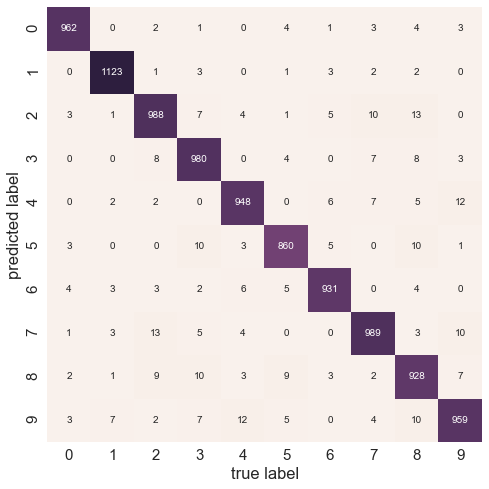

In [50]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_pred, y_test)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

We get an overall accuracy of 97% with the Multilayer Perceptron classification. From the confusion matrix, we can clearly see that most of the images have been correctly classified. Let us also check the images in the test data itself against the prediction.

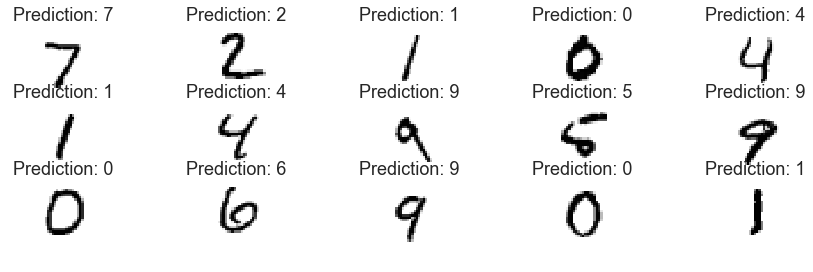

In [51]:
# create figure
fig = plt.figure(figsize=(15,4))
# loop over the first 15 images of the test set
for i in range(15):
    ax = plt.subplot(3, 5, i+1)
    ax.set_title('Prediction: {}'.format(y_pred[i]))
    ax.axis('off')
    image = X_test.iloc[i, :].values.reshape(28, 28)
    imgplot = plt.imshow(image, cmap='binary')
plt.show()